Import Library

In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix,accuracy_score




## Data



In [19]:
data = pd.read_csv('lung_cancer_examples.csv')


In [20]:
data.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


## Data Understanding

In [21]:
data.shape


(59, 7)

In [22]:
data.columns

Index(['Name', 'Surname', 'Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result'], dtype='object')

In [23]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [24]:
data["Result"].nunique()

2

As there are two distinct values means we have to do binary classification 

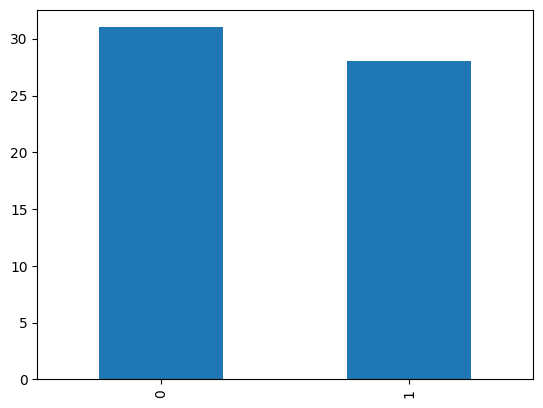

In [25]:

data["Result"].value_counts().plot(kind="bar")
plt.show()

### Profiling Report

In [26]:
# # pandas profiling 
# profile = ProfileReport(data,title="Lung Cancer Prediction")
# profile.to_file("Lung Cancer Prediction.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
data.columns

Index(['Name', 'Surname', 'Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result'], dtype='object')

## VISUALIZING THE DATA


<Axes: xlabel='Age', ylabel='Alkhol'>

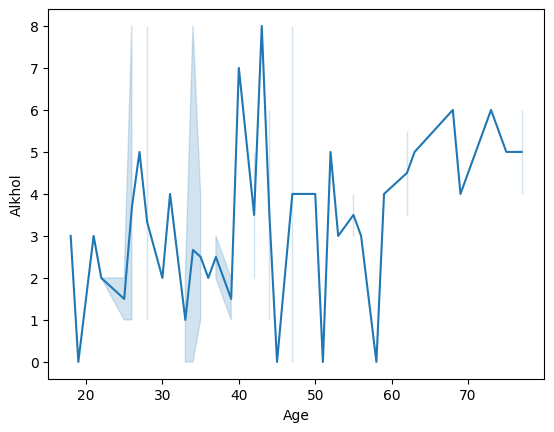

In [28]:
sns.lineplot(x="Age",y="Alkhol",data=data)


<Axes: xlabel='Age', ylabel='Smokes'>

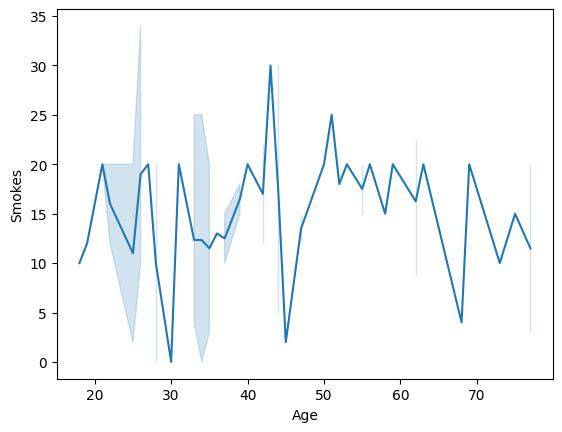

In [29]:
sns.lineplot(x=data['Age'],y=data['Smokes'],data=data)

In [30]:
data.corr()

/tmp/ipykernel_13218/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,Smokes,AreaQ,Alkhol,Result
Age,1.000000,0.053665,-0.268957,0.318621,0.637726
Smokes,0.053665,1.000000,-0.353295,0.469915,0.373444
AreaQ,-0.268957,-0.353295,1.000000,-0.714412,-0.746621
Alkhol,0.318621,0.469915,-0.714412,1.000000,0.810439
Result,0.637726,0.373444,-0.746621,0.810439,1.000000


/tmp/ipykernel_13218/277850394.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


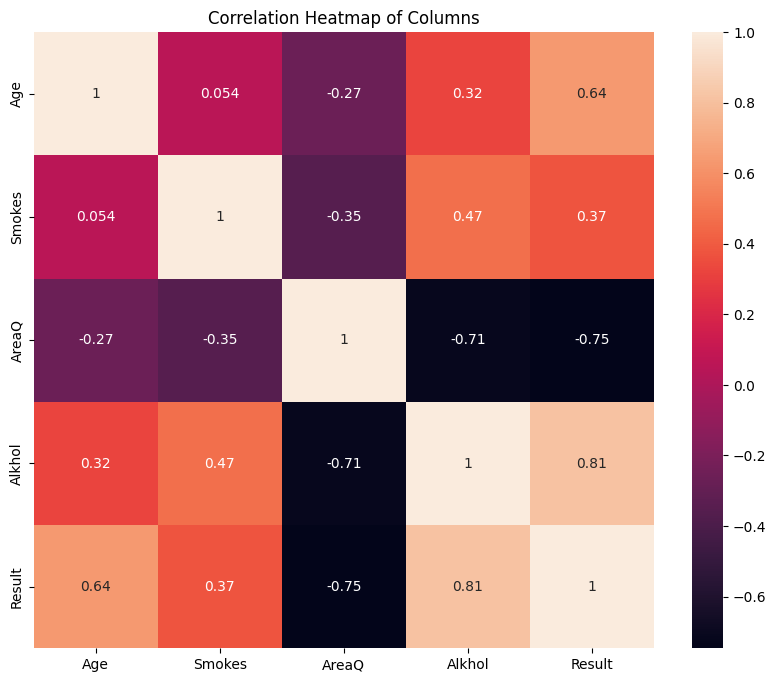

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Heatmap of Columns')
plt.show()

## Data Preprocessing

In [32]:
data.isnull().sum().sum()

0

- No missing values 

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


<!-- - As most of the columns are numeric and int type, so no need to perform scaling -->

Eliminate irrelevant variables in analysis such as name, surname

In [36]:
data1 = data.drop(columns=['Name','Surname'],axis=1)
print(data1.shape)

(59, 5)


In [37]:
data1.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


### Data for training and testing



In [38]:
from sklearn.model_selection import train_test_split
Y = data1['Result']
X = data1.drop(columns=['Result'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=9)

In [39]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (53, 4)
Y train shape:  (53,)
X test shape:  (6, 4)
Y test shape:  (6,)


## Spot Checking

In [40]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))


In [41]:
results = []

names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.983333 (0.050000)
KNN: 0.890000 (0.147611)
Decision Tree: 0.943333 (0.086987)
NB: 0.983333 (0.050000)


## Logistic regression classification

Logistic regression is a technique that can be applied to binary classification problems. This technique uses the logistic function or sigmoid function, which is an S-shaped curve that can assume any real value number and assign it to a value between 0 and 1, but never exactly in those limits. Thus, logistic regression models the probability of the default class (the probability that an input $(X)$ belongs to the default class $(Y=1)$) $(P(X)=P(Y=1|X))$. In order to make the prediction of the probability, the logistic function is used, which allows us to obtain the log-odds or the probit. Thus, the model is a linear combination of the inputs, but that this linear combination relates to the log-odds of the default class.

Started from make an instance of the model setting the default values. Specify the inverse of the regularization strength in 10. Trained the logistic regression model with the training data, and then applied such model to the test data.

In [42]:
from sklearn.linear_model import LogisticRegression

# We defining the model
logreg = LogisticRegression(C=10)

# We train the model
logreg.fit(X_train, Y_train)

# We predict target values
Y_predict1 = logreg.predict(X_test)

# accuracy_score = accuracy_score(Y_test, Y_predict1)



In [43]:
# print(accuracy_score)

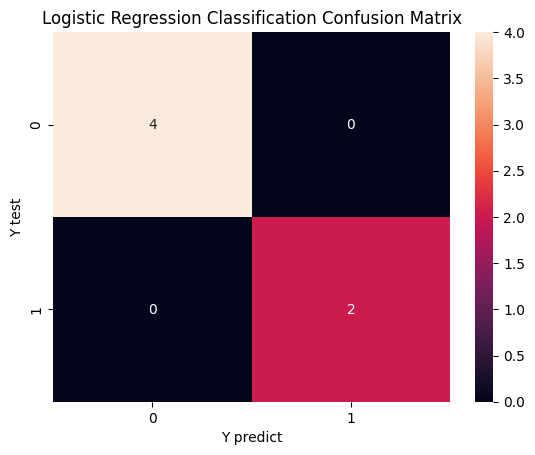

In [44]:

confusion_matrix(Y_test, Y_predict1)

sns.heatmap(confusion_matrix(Y_test, Y_predict1), annot=True)
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()


## Naive bayes classification

The naive Bayesian classifier is a probabilistic classifier based on Bayes' theorem with strong independence assumptions between the features. Thus, using Bayes theorem $\left(P(X|Y)=\frac{P(Y|X)P(X)}{P(Y)}\right)$, we can find the probability of $X$ happening, given that $Y$ has occurred. Here, $Y$ is the evidence and $X$ is the hypothesis. The assumption made here is that the presence of one particular feature does not affect the other (the predictors/features are independent). Hence it is called naive. In this case we will assume that we assume the values are sampled from a Gaussian distribution and therefore we consider a Gaussian Naive Bayes.

In [45]:
from sklearn.naive_bayes import GaussianNB

# We define the model
nbcla = GaussianNB()

# We train model
nbcla.fit(X_train, Y_train)

# We predict target values
Y_predict2 = nbcla.predict(X_test)

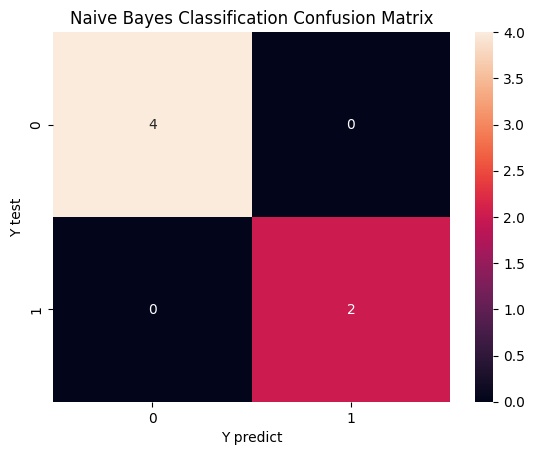

In [46]:
# The confusion matrix
confusion_matrix(Y_test, Y_predict2)

sns.heatmap(confusion_matrix(Y_test, Y_predict2), annot=True)
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

## Decision tree classification

A decision tree is a flowchart-like tree structure where an internal node represents feature, the branch represents a decision rule, and each leaf node represents the outcome. The decision tree analyzes a set of data to construct a set of rules or questions, which are used to predict a class, i.e., the goal of decision tree is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. In this sense the decision tree selects the best attribute using to divide the records, converting that attribute into a decision node and dividing the data set into smaller subsets, to finally start the construction of the tree repeating this process recursively. 

In [47]:
from sklearn.tree import DecisionTreeClassifier

# We define the model
dt = DecisionTreeClassifier(random_state=3)

# We train model
dt.fit(X_train, Y_train)

# We predict target values
Y_predict3 = dt.predict(X_test)

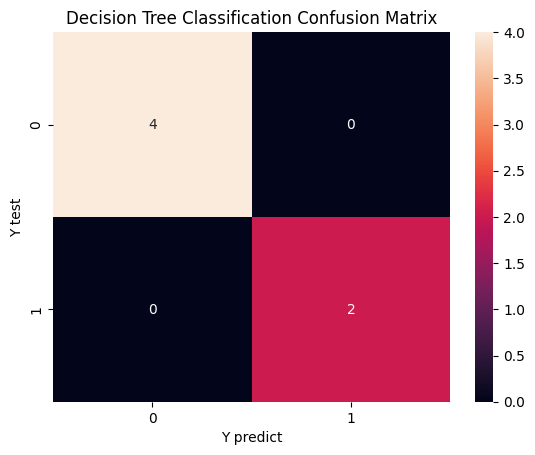

In [48]:
# The confusion matrix
confusion_matrix(Y_test, Y_predict3)

sns.heatmap(confusion_matrix(Y_test, Y_predict3), annot=True)
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [49]:
Y_test.shape

(6,)

## K-Nearest Neighbor classification

K-Nearest neighbors is a technique that stores all available cases and **classifies new cases based on a similarity measure (e.g., distance functions)**. This technique is non-parametric since there are no assumptions for the distribution of underlying data and it is lazy since it does not need any training data point model generation. All the training data used in the test phase. **This makes the training faster and the test phase slower and more costlier. In this technique, the number of neighbors k is usually an odd number if the number of classes is 2**. For finding closest similar points,  find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance.



In [50]:
from sklearn.neighbors import KNeighborsClassifier

# We define the model
knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

# We train model
knn.fit(X_train, Y_train)

# We predict target values
Y_predict4 = knn.predict(X_test)

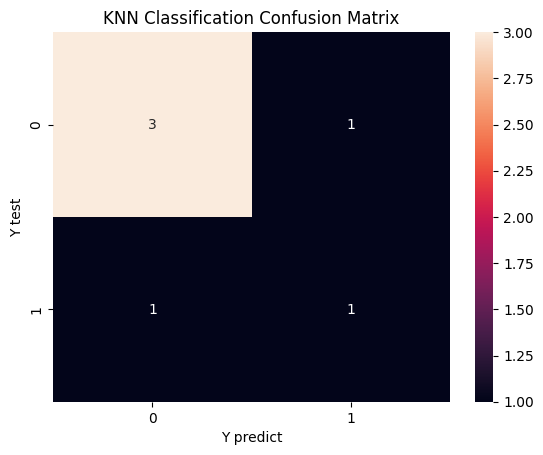

In [51]:
# The confusion matrix


sns.heatmap(confusion_matrix(Y_test, Y_predict4), annot = True)
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

### Test score

In [52]:
print(accuracy_score(Y_test, Y_predict1))
print(accuracy_score(Y_test, Y_predict2))
print(accuracy_score(Y_test, Y_predict3))
print(accuracy_score(Y_test, Y_predict4))

1.0
1.0
1.0
0.6666666666666666


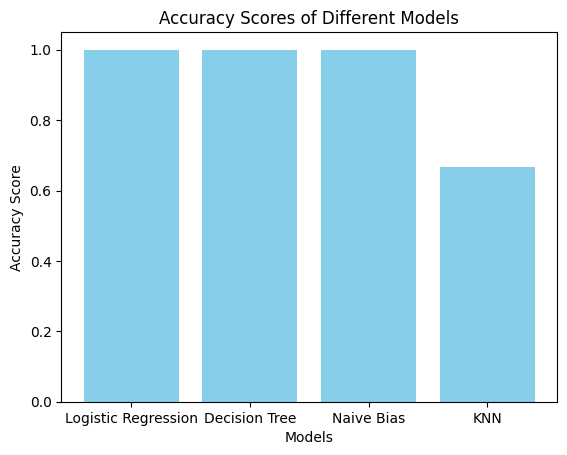

In [53]:
# Accuracy scores
accuracy_scores = [accuracy_score(Y_test, Y_predict1),
                   accuracy_score(Y_test, Y_predict2),
                   accuracy_score(Y_test, Y_predict3),
                   accuracy_score(Y_test, Y_predict4)]

# Model names or labels
model_names = ['Logistic Regression', 'Decision Tree', 'Naive Bias', 'KNN']

# Create bar plot
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Models')
plt.show()


# Making a Prediction 

In [54]:
X_test.columns

Index(['Age', 'Smokes', 'AreaQ', 'Alkhol'], dtype='object')

In [ ]:
age , smokes , areaq , alkhol = 18, 9, 4, 4
prediction1 = logreg.predict([[age , smokes , areaq , alkhol]])
prediction1

/home/talha/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
age , smokes , areaq , alkhol = 50, 25, 10, 8
prediction1 = logreg.predict([[age , smokes , areaq , alkhol]])
prediction1

/home/talha/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])